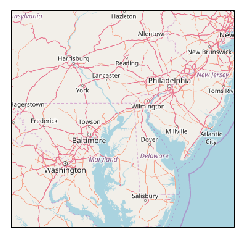

In [10]:
"""
Initial work to plot the desired lat/lon grid used in commute time

Produces a map showing high resolution background imagery provided by OpenStreetMap.
Reference:
http://scitools.org.uk/cartopy/docs/latest/examples/tube_stations.html

"""
from matplotlib.path import Path
import matplotlib.pyplot as plt
import numpy as np
import cartopy
import cartopy.crs as ccrs
from cartopy.io.img_tiles import OSM
import pandas


imagery = OSM() # Use Open street maps data
ax = plt.axes(projection=imagery.crs)
ax.set_extent([-78, -74, 38, 41], ccrs.Geodetic()) #longitude, latitude (x1,x2,y1,y2)
#note: later, use the max/min lat/lon from calculated grid to set this


# Add the imagery to the map. Later iterations will need to intellegently determine zoom level
#ax.add_image(imagery, 5) #too low resolution
ax.add_image(imagery, 7) #good
#ax.add_image(imagery, 8) #too high resolution


**Dummy locations being used (lat/lon)**

- Baltimore: (39,-77)
- Philadelphia: (40,-75)

Note: Cartopy uses lon/lat ordering for processing


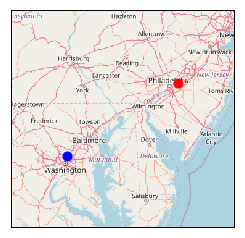

In [17]:
imagery = OSM() # Use Open street maps data
ax = plt.axes(projection=imagery.crs)
ax.set_extent([-78, -74, 38, 41], ccrs.Geodetic()) #longitude, latitude (x1,x2,y1,y2)


# Add the imagery to the map. Later iterations will need to intellegently determine zoom level
#ax.add_image(imagery, 5) #too low resolution
ax.add_image(imagery, 7) #good
#ax.add_image(imagery, 8) #too high resolution

#These are values which will be defined through address lookup in other modules
afDest1=np.array([-77.0,39.0]) #lon/lat #make sure this is a float
afDest2=np.array([-75.0,40.0]) #lon/lat


#Start
plt.plot(afDest1[0], afDest1[1],
         marker='o', color='blue', markersize=9, transform=ccrs.Geodetic(),
         linestyle='')

#Stop
plt.plot(afDest2[0], afDest2[1],
         marker='o', color='red', markersize=9, transform=ccrs.Geodetic(),
         linestyle='')

In [19]:
##Define square (not rotated)

origin=np.array([0,0])
corner=afDest2-afDest1
#pythagorean theorm for distance, 45-45-90 triangle for ratio to side
hypotenuse=np.sqrt((corner[0]**2+corner[1]**2)) 
side=hypotenuse/np.sqrt(2) 
#specify spacing for side
spacing=np.linspace(0,side,num=10,endpoint=True)

#Create an initial grid 
 #Create a mesh grid
 #Transpose to make each lat/lon point into a row
 #reshape to combine multiple arrays into one
aInitGrid=np.array(np.meshgrid(spacing, spacing, indexing='xy')).T.reshape(-1, 2)


#test= np.array(np.meshgrid([0,1,2], [4,5,6], indexing='ij'))
#test=np.array(np.meshgrid([0,1,2], [4,5,6], indexing='xy')).T.reshape(-1, 2)



# dataframe of (lon/lat) pairs
dfGrid=pandas.DataFrame(aInitGrid,columns=['RelLon','RelLat']) 





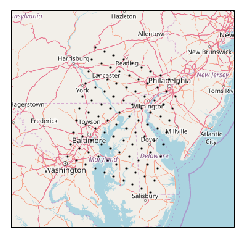

In [22]:
imagery = OSM() # Use Open street maps data
ax = plt.axes(projection=imagery.crs)
ax.set_extent([-78, -74, 38, 41], ccrs.Geodetic()) #longitude, latitude (x1,x2,y1,y2)


# Add the imagery to the map. Later iterations will need to intellegently determine zoom level
#ax.add_image(imagery, 5) #too low resolution
ax.add_image(imagery, 7) #good
#ax.add_image(imagery, 8) #too high resolution


##do the math to rotate the grid and reset origin

#calculate rotation of square relative to lat/lon, subtract 45deg inside square
fTheta=np.arcsin(corner[1]/hypotenuse)-(np.pi/4) #use to avoid a divide by zero possibility



#rotate grid
dfGrid['Lon']=dfGrid['RelLon']*np.cos(fTheta)-dfGrid['RelLat']*np.sin(fTheta)
dfGrid['Lat']=dfGrid['RelLon']*np.sin(fTheta)+dfGrid['RelLat']*np.cos(fTheta)


dfGrid['CorrLon']=dfGrid['Lon']+afDest1[0]
dfGrid['CorrLat']=dfGrid['Lat']+afDest1[1]




#plot coarse grid
plt.plot(dfGrid['CorrLon'],dfGrid['CorrLat'],
         marker='o', color='black', markersize=1, transform=ccrs.Geodetic(),
         linestyle='')


In [ ]:
#for arbitrary point, increase resolution 
i=25
dfGrid.loc[i,'RelLon']
spacing[1] # default space
fHRSpace=spacing[1]/3 # high resolution space (0.33 to avoid overlap)

#xarray centered on coarse point
fLonTemp=dfGrid.loc[i,'RelLon']
afLonTemp=np.linspace(fLonTemp-fHRSpace,fLonTemp+fHRSpace,num=3,endpoint=True)
#yarray centered on coarse point
fLatTemp=dfGrid.loc[i,'RelLat']
afLatTemp=np.linspace(fLatTemp-fHRSpace,fLatTemp+fHRSpace,num=3,endpoint=True)

aTempGrid=np.array(np.meshgrid(afLonTemp, afLatTemp, indexing='xy')).T.reshape(-1, 2)
dfTempGrid=pandas.DataFrame(aTempGrid,columns=['RelLon','RelLat']) 

#remove existing data point to avoid duplicating API call
dfTempGrid.drop(index=[4], inplace=True)


#rotate grid
dfTempGrid['Lon']=dfTempGrid['RelLon']*np.cos(fTheta)-dfTempGrid['RelLat']*np.sin(fTheta)
dfTempGrid['Lat']=dfTempGrid['RelLon']*np.sin(fTheta)+dfTempGrid['RelLat']*np.cos(fTheta)


#correct to final grid
dfTempGrid['CorrLon']=dfTempGrid['Lon']+afDest1[0]
dfTempGrid['CorrLat']=dfTempGrid['Lat']+afDest1[1]
